### 17) 모형의 진단과 수정

c:\Python3.9.13\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    

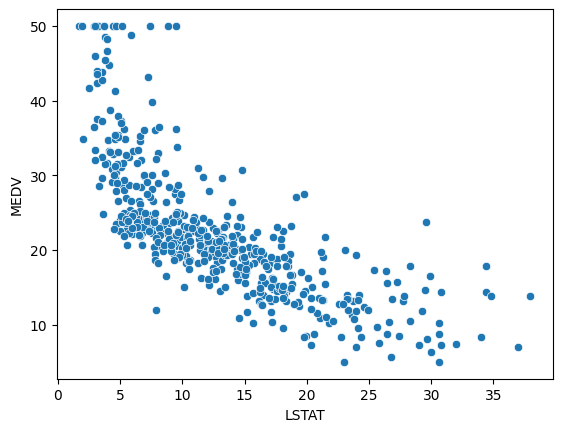

In [1]:
#기계학습모형의 성능을 진단하고 성능을 개선하는 과정

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

df_boston = pd.concat([dfX, dfy], axis=1)

#두 변수는 비선형 관계임(인구중 하위계층 비율과 주택가격)
sns.scatterplot(x="LSTAT", y="MEDV", data=df_boston)
plt.show()

In [7]:
import statsmodels.api as sm

model1 = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_boston)

result1 = model1.fit()

print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           5.08e-88
Time:                        10:18:37   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

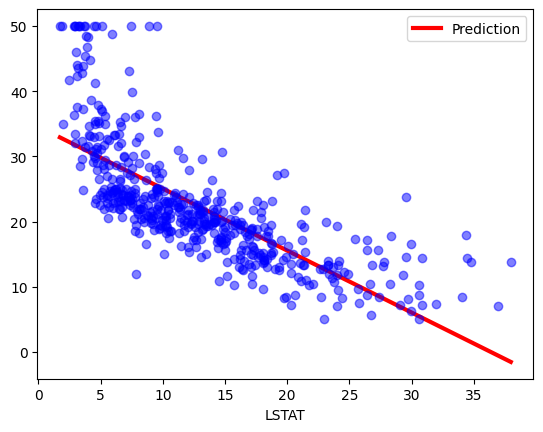

In [5]:
#예측값과 실제값 비교

y_hat1 = result1.predict(df_boston)

df1 = pd.concat([y_hat1, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df1.columns = ["Prediction", "LSTAT"]
df1.plot(x="LSTAT", style="r-", lw=3)

plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()
#예측력이 약한 모형

In [6]:
#LSTAT을 제곱한 비선형 독립변수를 추가한 모형

model2 = sm.OLS.from_formula("MEDV ~ LSTAT + I(LSTAT**2)", data=df_boston)
#                             종속     독립   I 정수, ** 제곱

result2 = model2.fit()

print(result2.summary())
#성능이 향상됨 54.4% => 64.1%

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          1.56e-112
Time:                        10:18:23   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

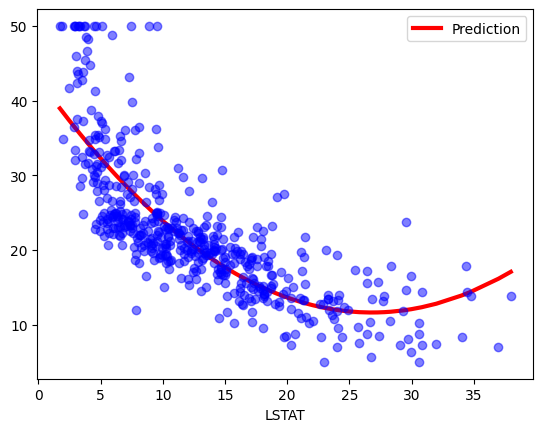

In [8]:
y_hat2 = result2.predict(df_boston)

df2 = pd.concat([y_hat2, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df2.columns = ["Prediction", "LSTAT"]
df2.plot(x="LSTAT", style="r-", lw=3)

plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()
#선형모형보다 좀더 적합한 모형

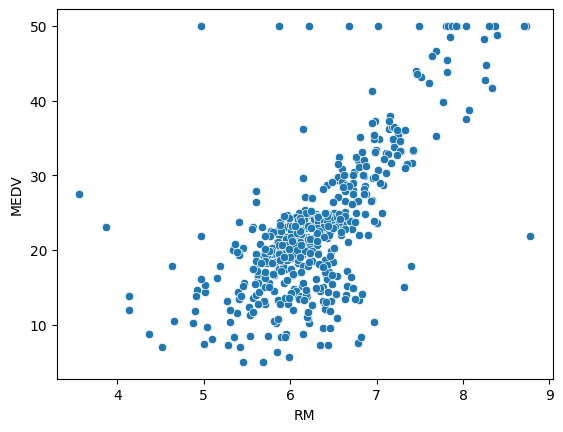

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [9]:
#범주형 변수의 예
# 방의 개수가 아주 적거나 아주 많으면 선형모형이 잘 맞지 않는다.

sns.scatterplot(x="RM", y="MEDV", data=df_boston)
plt.show()

df_boston['RM']

In [10]:
model3 = sm.OLS.from_formula("MEDV ~ RM", data=df_boston)

result3 = model3.fit()

print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           2.49e-74
Time:                        10:19:09   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

<Axes: xlabel='CAT_RM', ylabel='MEDV'>

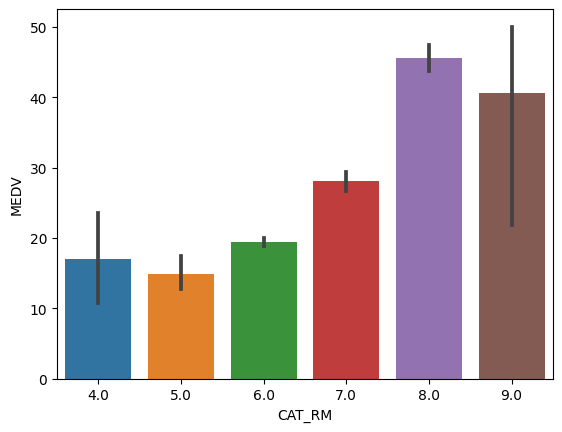

In [11]:
import numpy as np

df_boston["CAT_RM"] = np.round(df_boston.RM)

sns.barplot(x="CAT_RM", y="MEDV", data=df_boston)

In [13]:
#실수형을 정수형으로 바꾸고 더미변수를 사용한 모형

model4 = sm.OLS.from_formula("MEDV ~ C(np.round(RM))+0", data=df_boston)
#                                    C 범주형 반올림

result4 = model4.fit()

print(result4.summary())
# 성능이 개선됨 48.4 => 53.7%

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     115.8
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           3.57e-81
Time:                        10:19:26   Log-Likelihood:                -1645.6
No. Observations:                 506   AIC:                             3303.
Df Residuals:                     500   BIC:                             3329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(np.round(RM))[4.0]    17.0200 

In [15]:
#독립변수가 시간인 경우 특정 시점에서 경과된 시간값으로 변형해야함
#일자별 전력수요량

df=pd.read_csv('c:/workspace3/data/energy_data.csv')
df.head()

,Unnamed: 0,Demand,Date
0,0,174.896295,2019-01-01
1,1,188.590935,2019-01-02
2,2,188.916891,2019-01-03
3,3,173.814244,2019-01-04
4,4,169.515175,2019-01-05


In [16]:
import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
df["Ordinal"] = df.Date.map(dt.datetime.toordinal)  # toordinal 서기 1년 1월 1일을 기준으로 경과한 날짜
df["Timestamp"] = df.Date.map(dt.datetime.timestamp)
#                                          1970.1.1 밀리세컨드
df.head()

,Unnamed: 0,Demand,Date,Ordinal,Timestamp
0,0,174.896295,2019-01-01,737060,1.546268e+09
1,1,188.590935,2019-01-02,737061,1.546355e+09
2,2,188.916891,2019-01-03,737062,1.546441e+09
3,3,173.814244,2019-01-04,737063,1.546528e+09
4,4,169.515175,2019-01-05,737064,1.546614e+09


In [18]:
#일단위 날짜를 기준으로 분석, 날짜는 단위가 크므로 스케일링이 필요함
model5 = sm.OLS.from_formula("Demand ~ scale(Ordinal)", data=df)
#                                       스케일링

result5 = model5.fit()

print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           0.000739
Time:                        10:20:22   Log-Likelihood:                -1709.7
No. Observations:                 365   AIC:                             3423.
Df Residuals:                     363   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        221.2775      1.374    160.

In [20]:
#시간에서 활용할 수 있는 추가적인 필드들
df["Year"] = df.Date.dt.year
df["Month"] = df.Date.dt.month
df["DayOfYear"] = df.Date.dt.dayofyear #연중 몇일차
df["DayOfMonth"] = df.Date.dt.daysinmonth #일수
df["DayOfWeek"] = df.Date.dt.dayofweek
# df["WeekOfYear"] = df.Date.dt.weekofyear #연중 몇주차
df["Weekday"] = df.Date.dt.weekday #요일코드
df["IsMonthStart"] = df.Date.dt.is_month_start
df["IsMonthEnd"] = df.Date.dt.is_month_end
df.tail()

,Unnamed: 0,Demand,Date,Ordinal,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,Weekday,IsMonthStart,IsMonthEnd
360,360,173.727990,2019-12-27,737420,1.577372e+09,2019,12,361,31,4,4,False,False
361,361,188.512817,2019-12-28,737421,1.577459e+09,2019,12,362,31,5,5,False,False
362,362,191.273009,2019-12-29,737422,1.577545e+09,2019,12,363,31,6,6,False,False
363,363,186.240144,2019-12-30,737423,1.577632e+09,2019,12,364,31,0,0,False,False
364,364,186.370181,2019-12-31,737424,1.577718e+09,2019,12,365,31,1,1,False,True


In [22]:
formula = """
Demand ~ scale(Ordinal) + C(Month)+0 + DayOfYear +
 C(DayOfMonth)+0 + C(DayOfWeek)+0 + C(Weekday)+0 +
C(IsMonthStart)+0 + C(IsMonthEnd)+0
"""
model6 = sm.OLS.from_formula(formula, data=df)

result6 = model6.fit()

print(result6.summary())
#3.1%에서 53.7%로 향상됨

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.98
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           4.74e-46
Time:                        10:20:50   Log-Likelihood:                -1574.8
No. Observations:                 365   AIC:                             3192.
Df Residuals:                     344   BIC:                             3273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(Month)[1]               

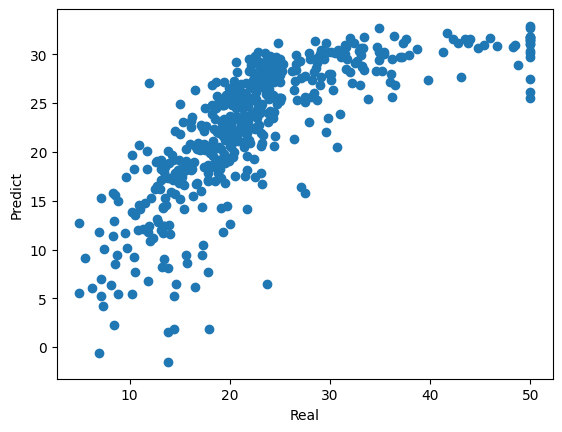

In [23]:
#독립변수 뿐 아니라 상황에 따라서는 종속변수도 변형할 수 있음
#실제주택가격과 예측값의 비교

plt.scatter(boston.target, y_hat1)
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()
#선형적으로 설명하기 어려운 모형

In [25]:
#종속변수를 제곱근 처리
model11 = sm.OLS.from_formula("np.sqrt(MEDV) ~ LSTAT", data=df_boston)

result11 = model11.fit()

print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:          np.sqrt(MEDV)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     789.7
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          3.09e-105
Time:                        10:21:09   Log-Likelihood:                -445.65
No. Observations:                 506   AIC:                             895.3
Df Residuals:                     504   BIC:                             903.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9499      0.053    112.374      0.0

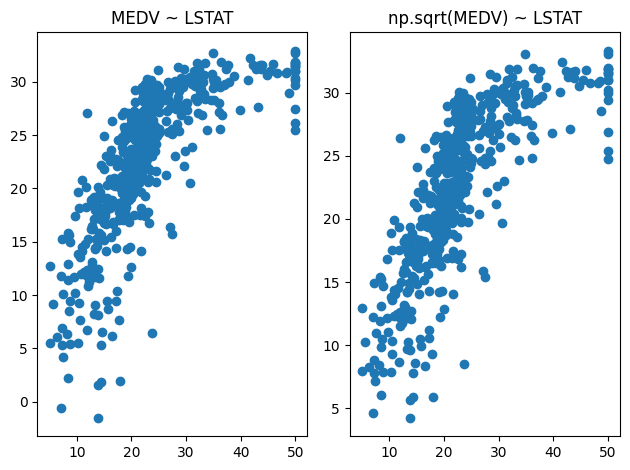

In [26]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")

plt.subplot(122)
plt.scatter(boston.target, (result11.predict(df_boston))**2)
plt.title("np.sqrt(MEDV) ~ LSTAT")

plt.tight_layout()
plt.show()


In [27]:
#로그를 취한 모형
model12 = sm.OLS.from_formula("np.log(MEDV) ~ LSTAT", data=df_boston)

result12 = model12.fit()

print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          2.23e-116
Time:                        10:21:24   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.0

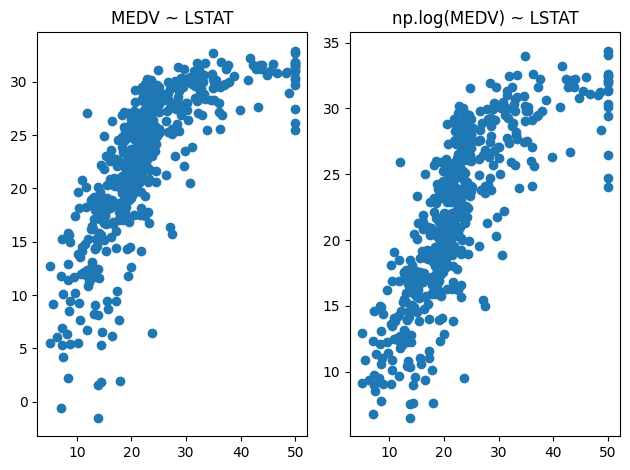

In [28]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")

plt.subplot(122)
plt.scatter(boston.target, np.exp(result12.predict(df_boston)))
plt.title("np.log(MEDV) ~ LSTAT")

plt.tight_layout()
plt.show()

In [29]:
#독립변수와 종속변수 모두 로그를 취한 모형(가장 성능이 좋은 모형)
model13=sm.OLS.from_formula("np.log(MEDV) ~ np.log(LSTAT)", data=df_boston)

result13 = model13.fit()

print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1058.
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          7.32e-126
Time:                        10:21:41   Log-Likelihood:                 21.325
No. Observations:                 506   AIC:                            -38.65
Df Residuals:                     504   BIC:                            -30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3618      0.042    103.603

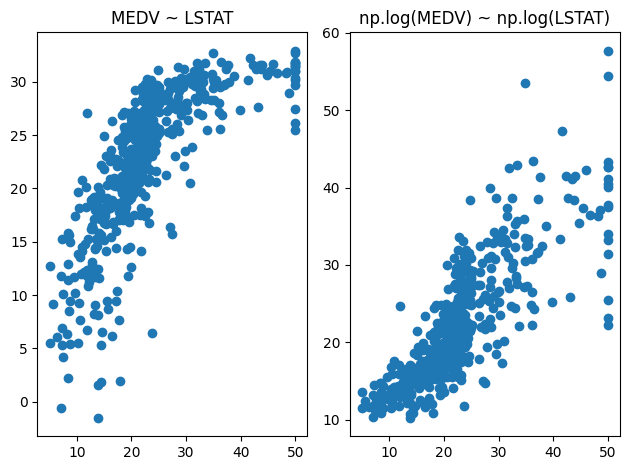

In [30]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")

plt.subplot(122)
plt.scatter(boston.target, np.exp(result13.predict(df_boston)))
plt.title("np.log(MEDV) ~ np.log(LSTAT)")

plt.tight_layout()
plt.show()